In [43]:
from time_series import TimeSeries
import numpy as np
import matplotlib.pyplot as plt

## Project 2 - Part 1.5

##### Data: Libraries Wifi.csv - https://data.cityofchicago.org/Education/Libraries-WiFi-Usage-2011-2014-/vbts-zqt4
Data was provided with the problem statement as an option to be used for the project.

Data tracks the number of WiFi sessions per month at Chicago Public Library locations from 2011 to 2014.

Number of Wifi sessions see almost exponential growth in number beginning Q1 of 2013. It would be interesting to see how this correlates with smartphone penetration in the city of Chicago in that time period.

There are no missing values in the dataset.

It has following columns

In [44]:
with open("Libraries Wifi.csv") as f:
    print(f.readline().strip().split(","))

['MONTH', 'YEAR', 'NUMBER OF SESSIONS', 'CUMULATIVE NUMBER OF SESSIONS']


### Step wise execution of Problem 1

TimeSeries class takes 2 arguments
1. Path of dataset file(csv)
2. Column number corresponding to the target variable - 'NUMBER OF SESSIONS' in our case

In [45]:
#create timeseries object
timeseries = TimeSeries("Libraries Wifi.csv", 3)

### Plot of Data
We see that the Number of Sessions have an increasing trend in general which changes into an almost exponential increase between Q1 2013 and end of 2014

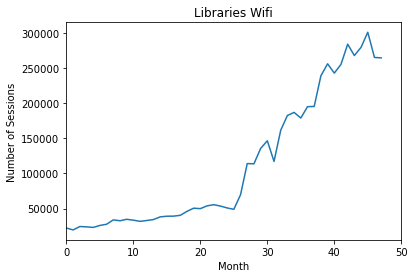

In [46]:
timeseries.plot_data()

### Moving Average

Provide the value of m - order/window of moving average to be used for further processing

In [47]:
m = 3

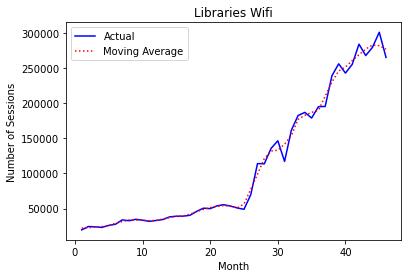

In [48]:
data_mov_avg = timeseries.moving_average(m)

In [49]:
m = 7

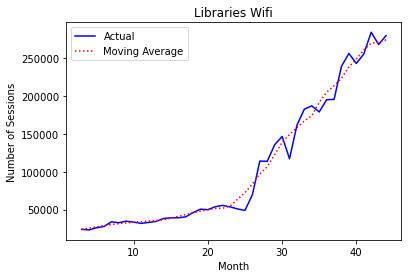

In [50]:
data_mov_avg = timeseries.moving_average(m)

In [51]:
m = 11

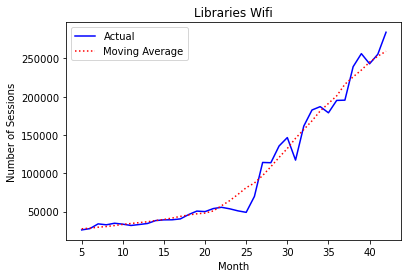

In [52]:
data_mov_avg = timeseries.moving_average(m)

##### Higher the value of m, smoother the moving average line we obtain with less regard for local crest and trough.

### Model 1 - Linear regression with y intercept fixed at 0

The function calculates m in y = mx and takes two arguments
1. Moving average data to be ued as the target
2. m - order/ window of moving average

It returns the coeicient of linear regression and the residual of the model on training dataset

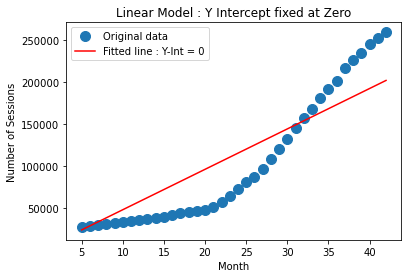

In [53]:
beta_y0, R_y0 = timeseries.linear_reg_y0(data_mov_avg, m)

In [54]:
print("Coefficient m in y = mx is: ", beta_y0[0])

Coefficient m in y = mx is:  4807.195937461092


In [55]:
print("Residual of the model is: ", R_y0[0])

Residual of the model is:  42972210850.07907


We see that the model has very high residual and is not a good fit to predict the Number of Sessions.

### Model 2 - Linear regression such that  intercept is not fixed at 0

The function calculates m in y = mx + c and takes two arguments
1. Moving average data to be ued as the target
2. m - order/ window of moving average

It returns the coeicient of linear regression and the residual of the model on training dataset

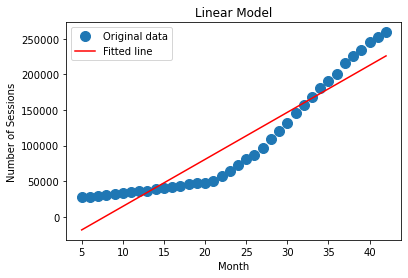

In [56]:
beta, R = timeseries.linear_reg_yInt(data_mov_avg, m)

In [57]:
print("Coefficient c,m in y = mx + c are: ", beta)

Coefficient c,m in y = mx + c are:  [-51540.82029066   6608.2506242 ]


In [58]:
print("Residual of the model is: ", R[0])

Residual of the model is:  24922134410.05987


Comparing the residuals of the two models to determine the better model.

In [59]:
if R_y0 < R:
    print("First mode is better")
elif R == R_y0 :
    print("Both models perform the same")
else:
    print("Second model is better")

Second model is better


### Predicting future datapoints

We will predict y_48 and y_58 using our model and see what values we obtain.

Model 1: y = mx

In [60]:
y_48 = beta_y0[0]*48
y_58 = beta_y0[0]*58

In [61]:
print("y_48 = ", y_48)
print("y_58 = ", y_58)

y_48 =  230745.40499813244
y_58 =  278817.36437274335


Model 2: y = mx + c

In [62]:
y_48 = beta[0] + beta[1]*48
y_58 = beta[0] + beta[1]*58

In [63]:
print("y_48 = ", y_48)
print("y_58 = ", y_58)

y_48 =  265655.20967084134
y_58 =  331737.7159128213


Values obtained from the second model seem more plausible when compared to the plot of the Moving Average and Actual values of number of sessions above.

Looking at the plot of data, we can see that threre are 2 distinct trends in the data, linear increase in value over first couple of years and an exponential increase over the second half. This means a linear model will not give a very good fit. Fitting 2 separate models over the first half of and second half can be good idea. Also, tree based models may give much better results for such data.